### League of Legends Diamond Classification Problem
Possibly the biggest online game of all time and a life choice for some people, but is it possible to predict the outcome of a game based on the statistics in the first 10 minutes?

According to the <a href='https://leagueoflegends.com'>leagueoflegends.com</a>
> League of Legends is a team-based strategy game where two teams of five powerful champions face off to destroy the other’s base. Choose from over 140 champions to make epic plays, secure kills, and take down towers as you battle your way to victory.

#### Game Basics
I imagine the matter that you are reading a post on League of Legends suggests you may be more than familiar with the rules, and have a much more in depth understanding of strategies and influences than I do. However, I will briefly explain some of the basics. Feel free to skip this part.


- Players accumulate gold and experience from a mixture of killing minions, monsters, other players and towers. 
       More gold -> better items -> easier killing.
       More experience -> higher levels -> easier killing.
- Wards provide map vision so we can see people coming to kill us.
       More wards -> better vision -> less deathing.
- Main objective of the game is to destroy a number of towers leading to the destruction of the opponents base.
       Kill towers -> kill base -> win game.

In [1]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import libraries for visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Show all columns
pd.set_option('display.max_columns', None)

print('Libraries Imported!')

Libraries Imported!


### Classification
The aim of this project is to try and predict a class for **blueWins**, which is the respective outcome of the game. We can do this by visualising the features in the following dataframe and subsequently using machine learning techniques to find the best predictions.  

Begin by viewing the different features we have available in the dataset provided.

In [2]:
# Read into dataframe
df = pd.read_csv('league_games.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# Get column names
cols = df.columns
print(cols)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


#### Target Variable "blueWins"
Let's seperate the target variable from the dataframe into a new variable "y". "gameId" can also be dropped as it is randomised and provides no information gain to the observations in the data.

In [4]:
# Seperate target variable from dataframe
y = df.blueWins

# Drop target and unnecessary features
drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)

x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Good news! Our dataset provides almost 50/50 data for our target variable, this means there is no data imbalance.

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


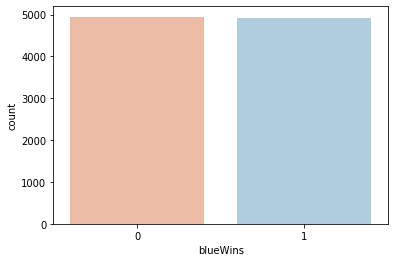

In [5]:
# Visualise blueWins using countplot
ax = sns.countplot(y, label='Count', palette='RdBu')
W, L = y.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

- Notice that numeric data has very different ranges, which gives higher weights to larger in machine learning models. So standardise.

### Analysis of basic statistics
The numeric data in our dataset have very different ranges which could effect machine learning models effectiveness by applying different weights to different features.

**Discrete Data**
- Blue/red wards placed/destroyed have a massive range and sdev.
- Blue/red Elite Monsters equal to sum of Dragons + Heralds, dragons more popular kill.
- Blue/red total gold/minions killed have low sdev (<10% mean)
- Blue gold diff / experience diff is exact negative of red gold diff / experience diff.

**Binary Data**
- Blue/red First blood is yes/no with approx 50% reliability.

In [6]:
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [7]:
# Drop unnecessary features (same as blueFirstBlood, blueDeaths etc.)
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,17404,7.0,18313,225,67


### Violin and Box Plots
Violin plots allow us to visualise the distribution of each features simply and seperate data points based on the final outcome of a game.

**Observations from plots**
- Blue kills appears to have a large positive impact on winning the game.
- Similarly, blue deaths has a large negative impact on winning the game (i.e positive on losing).
- Blue assists similar plot to blue kills, need to get kills to get assists so scales with kills.
- First blood is positively correlated with outcome but also mirrors blue kills.
- Gold and experience differences have major influence.
- Minions and Jungle minions do not have much impact.

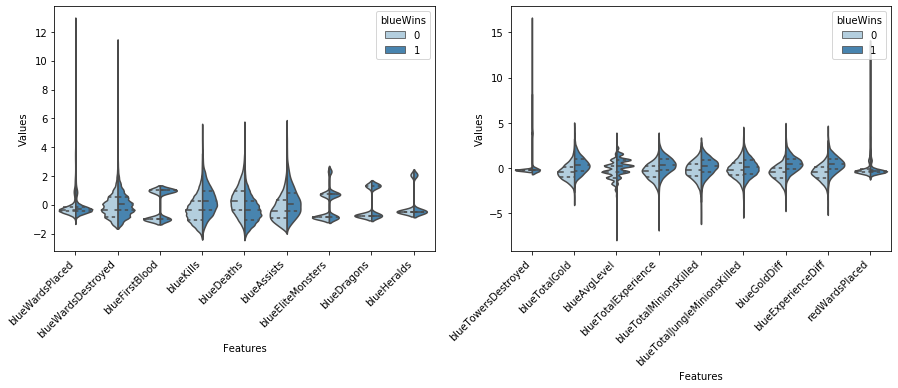

In [8]:
# Copy feature matrix and standardise
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Create violin plot of features
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Create violin plot
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

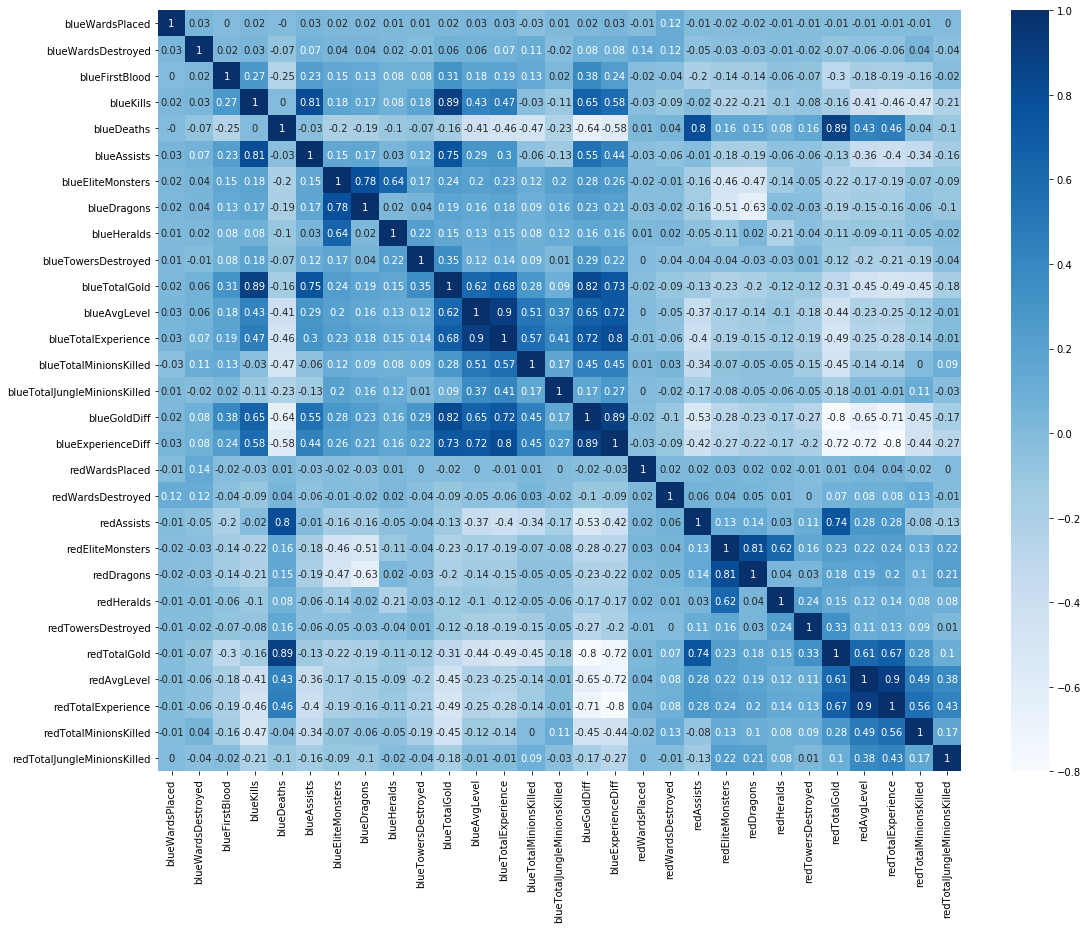

In [9]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

In [10]:
# Drop unnecessary features
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

### Ward Data
We can see the seperation of data points is pretty well randomised in the plot of ward data below. From knowledge of the game I would suggest that ward placing and destruction in Diamond is quite systematic and therefore there isn't much variance in the data as suggested by the violin plots above.  

With this in mind, I will not use ward data in my learning model.

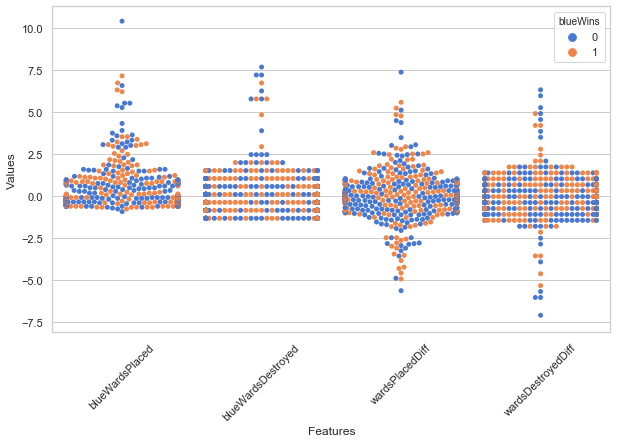

In [11]:
sns.set(style='whitegrid', palette='muted')

x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [12]:
# Drop unnecessary features
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

### Kills, Assists and Deaths
The distribution of the kills, deaths and assists appear similar, assists of course scale with kills (or red assists with blue deaths) so the histograms are as expected.  

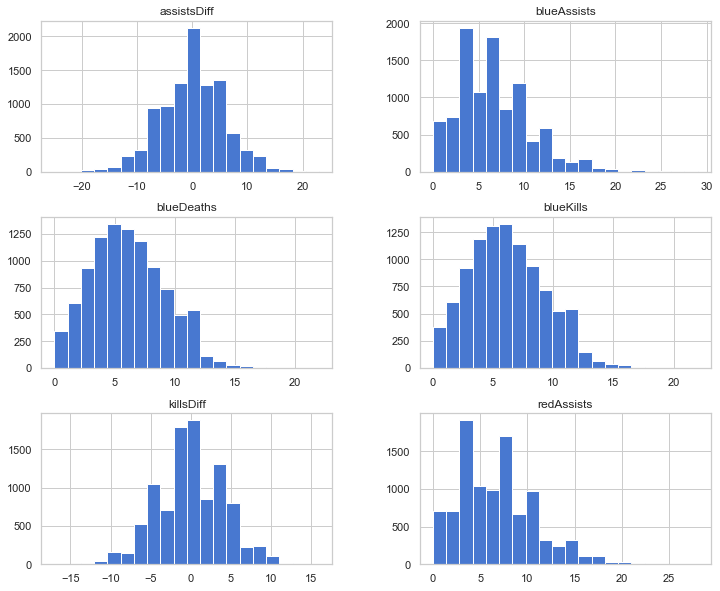

In [13]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

The importance of each feature on the outcome of a game can be pictured below, where the outcome isn't solely represented by these features, there is a clear correlation.  

Include **killsDiff** and **assistsDiff** in modelling.

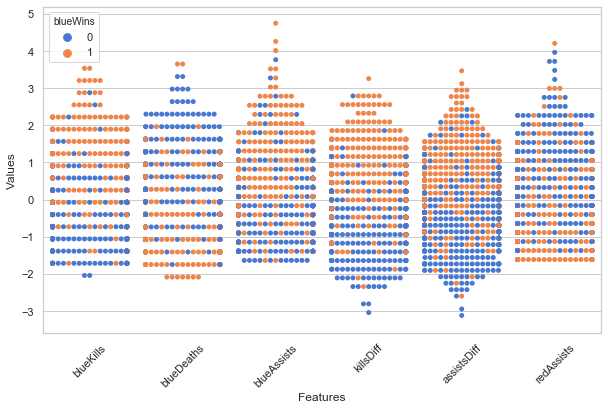

In [14]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

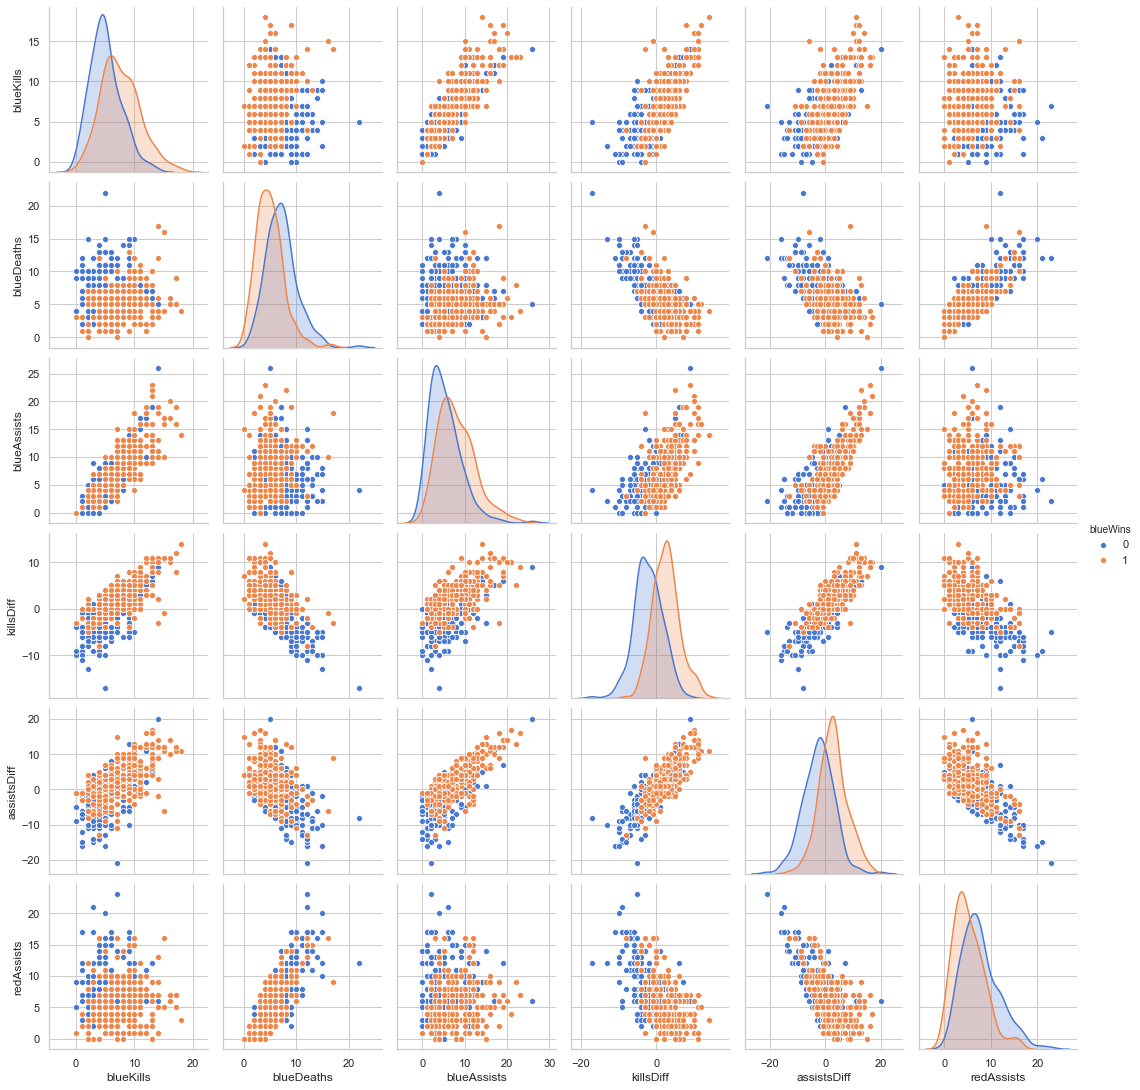

In [15]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

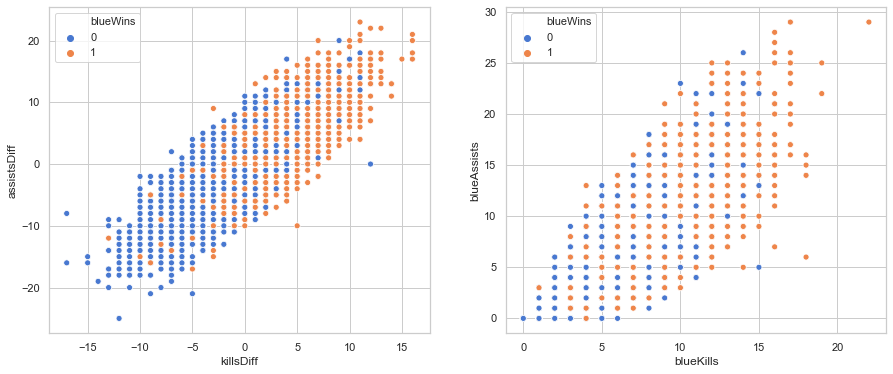

In [16]:
data = pd.concat([y, x], axis=1)

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='killsDiff', y='assistsDiff', hue='blueWins', data=data, ax=ax[0])

sns.scatterplot(x='blueKills', y='blueAssists', hue='blueWins', data=data, ax=ax[1])
plt.show()

In [17]:
# Drop unnecessary features
drop_cols = ['blueFirstBlood','blueKills','blueDeaths','blueAssists','redAssists']
x.drop(drop_cols, axis=1, inplace=True)

### Elite Monsters
Including all three of the features that are **blueEliteMonsters**, **blueDragons** and **blueHeralds** would be unadvisable since the first of these is an accumulation of the others. Grouping the data below shows that having a dragon advantage gives a larger advantage than having a herald advantage.  

The dragon group shows a 64% chance of winning if killing the dragon before 10 minutes, 50% if equal on dragons and 37% chance if the opposite team has killed the dragon. S

Dragons pose more influence than heralds on the outcome of the game, therefore choose to include both **heralds** and **dragons** individually in my machine learning model.

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


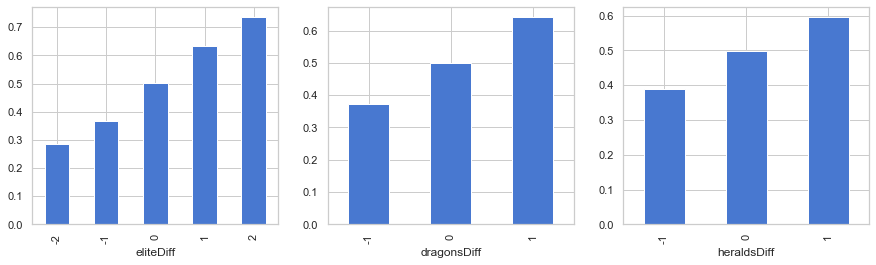

In [18]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

In [19]:
# Drop unnecessary features
drop_cols = ['blueEliteMonsters','blueDragons','blueHeralds',
            'redEliteMonsters','redDragons','redHeralds']
x.drop(drop_cols, axis=1, inplace=True)

### Towers
A major objective for each team and we should therefore expect to be heavily influential with the outcome of the game.

The plots below show that although it is unlikely there will be any towers destroyed in the first ten minutes of the game, the destruction of a tower provides a great advantage to a team, and therefore will be included in my model as **towerDiff**.

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

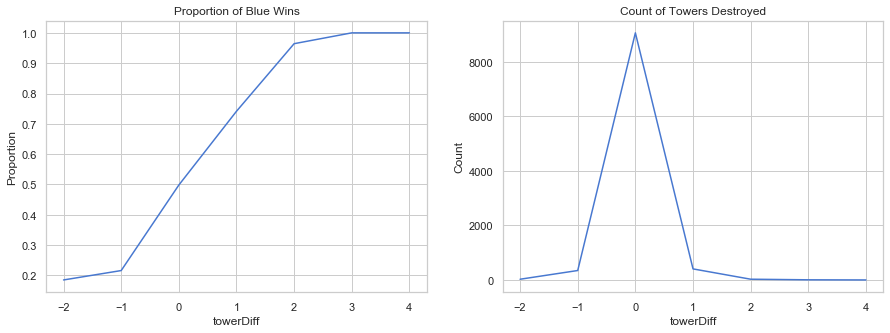

In [20]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

In [21]:
# Drop unnecessary features
drop_cols = ['blueTowersDestroyed','redTowersDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

In [22]:
x.head()

,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
0,17210,17039,195,36,643,-8,16567,17047,197,55,3,3,0,0,0,0
1,14712,16265,174,43,-2908,-1173,17620,17438,240,52,0,3,-1,-1,-2,-1
2,16113,16221,186,46,-1172,-1033,17285,17254,203,28,-4,-10,1,0,1,0
3,15157,17954,201,55,-1321,-7,16478,17961,235,47,-1,-5,0,1,1,0
4,16400,18543,210,57,-1004,230,17404,18313,225,67,0,-1,-1,0,-1,0


### Gold and Experience

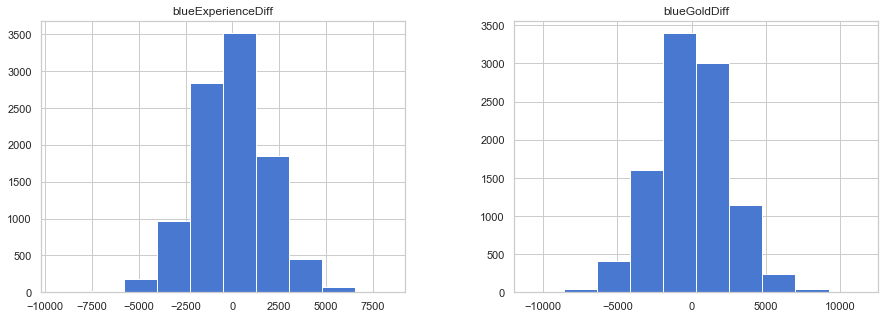

In [23]:
data = pd.concat([y, x], axis=1)

data[['blueGoldDiff','blueExperienceDiff']].hist(figsize=(15,5))
plt.show()

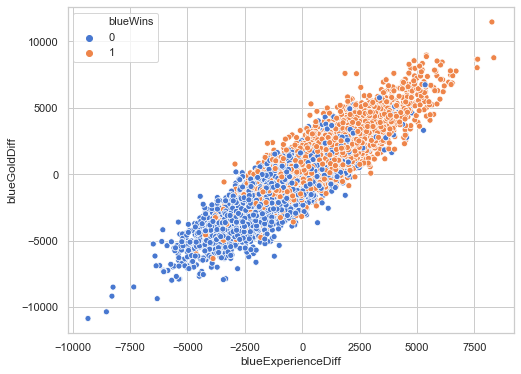

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins', data=data)

In [25]:
# Drop unnecessary features
drop_cols = ['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']
x.drop(drop_cols, axis=1, inplace=True)

x.rename(columns={'blueGoldDiff':'goldDiff', 'blueExperienceDiff':'expDiff'}, inplace=True)

### Minions and Jungle Minions

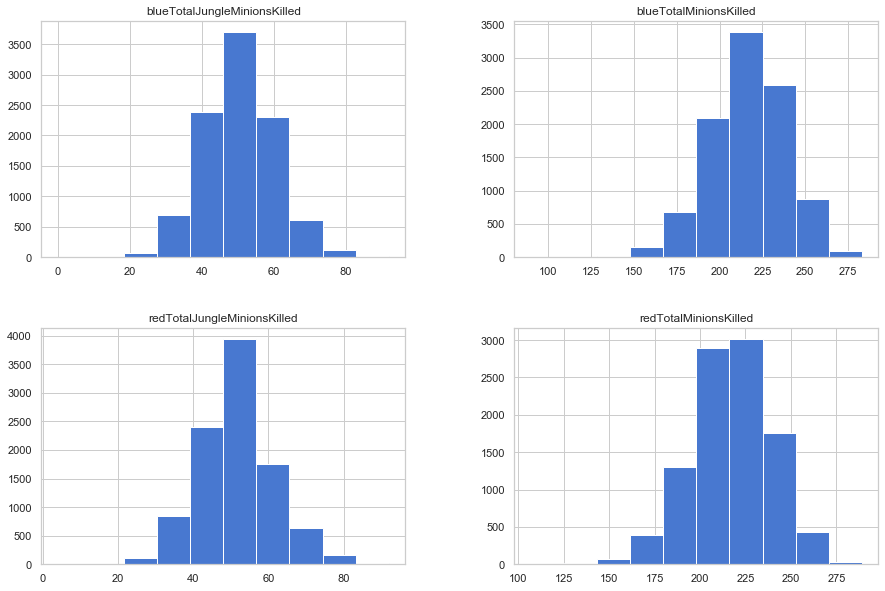

In [26]:
data = pd.concat([y, x], axis=1)

data[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].hist(figsize=(15,10))
plt.show()

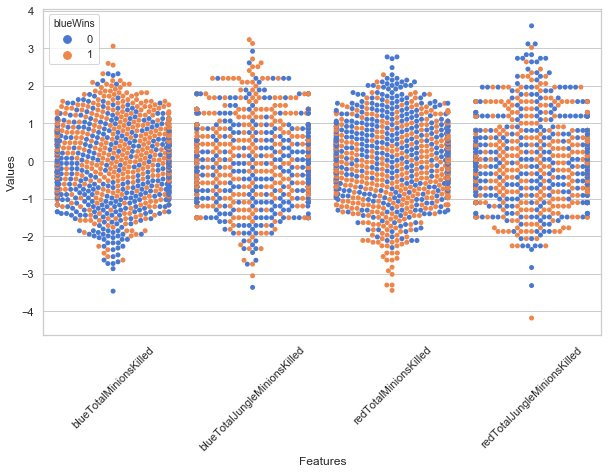

In [27]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [28]:
# Drop unnecessary features
drop_cols = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']
x.drop(drop_cols, axis=1, inplace=True)

## Machine Learning
Below I use some machine learning algorithms from the Scikit-Learn library to see how effective the features I have selected above are for predicting the outcome of a Diamond League of Legends match.

In [29]:
# Import libraries for machine learning models
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

print('Machine Learning Libraries Imported!')

Machine Learning Libraries Imported!


In [30]:
print(x.shape,y.shape)
x.head()

(9879, 8) (9879,)


,goldDiff,expDiff,killsDiff,assistsDiff,dragonsDiff,heraldsDiff,eliteDiff,towerDiff
0,643,-8,3,3,0,0,0,0
1,-2908,-1173,0,3,-1,-1,-2,-1
2,-1172,-1033,-4,-10,1,0,1,0
3,-1321,-7,-1,-5,0,1,1,0
4,-1004,230,0,-1,-1,0,-1,0


In [31]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7903, 8) (7903,)
Test set: (1976, 8) (1976,)


In [32]:
X[0:5]

array([[ 0.25622839,  0.01334201,  0.7040632 ,  0.52319573,  0.05816194,
        -0.04741189,  0.02170701, -0.02586573],
       [-1.191254  , -0.59334248, -0.01102662,  0.52319573, -1.07962383,
        -1.74444818, -1.85116266, -3.10451042],
       [-0.48361406, -0.52043619, -0.96447973, -1.73120649,  1.19594771,
        -0.04741189,  0.95814185, -0.02586573],
       [-0.54435044,  0.01386277, -0.2493899 , -0.86412871,  0.05816194,
         1.64962441,  0.95814185, -0.02586573],
       [-0.41513278,  0.13728271, -0.01102662, -0.17046649, -1.07962383,
        -0.04741189, -0.91472783, -0.02586573]])

In [58]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

### K-Nearest Neighbours 

In [59]:
# Test different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

# Use most accurate k value to predict test values
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [60]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'K-Nearest Neighbours'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [61]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Decision Trees

In [62]:
# Initialise Decision Tree classifier and predict
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
y_pred = drugTree.predict(X_test)

In [63]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'Decision Trees'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [64]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Logistic Regression

In [65]:
# Train and predict logistic regression model
LR = LogisticRegression(C=0.01, solver='liblinear')
y_pred = LR.fit(X_train,y_train).predict(X_test)

In [66]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'Logistic Regression'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [67]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Support Vector Machines

In [68]:
clf = svm.SVC(kernel='rbf')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [69]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'Support Vector Machines'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [70]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Naive Bayes

In [71]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [72]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'Naive Bayes'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [73]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Random Forest

In [78]:
# Instantiate Random Forest Classifier and predict values
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [75]:
# Create confusion matrix and interpret values
con = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
algorithm = 'Random Forest Classifier'
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f_score = (2 * precision * recall) / (recall + precision)

In [76]:
# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

### Evaluation of Machine Learning Models
**Logistic Regression** had the highest accuracy score of the machine learning models used with a prediction accuracy of 74.646%. Since we are trying to predict an outcome of a game, there isn't much risk involved with false positives or negatives and therefore we look to the accuracy for the greattest predicting model.

In [77]:
print(table)

+--------------------------+----------+---------+-----------+---------+
|        Algorithm         | Accuracy |  Recall | Precision | F-Score |
+--------------------------+----------+---------+-----------+---------+
|   K-Nearest Neighbours   | 0.70698  | 0.72561 |  0.69795  | 0.71151 |
|      Decision Trees      | 0.73077  | 0.77033 |  0.71241  | 0.74023 |
|   Logistic Regression    | 0.74646  |  0.7439 |  0.74618  | 0.74504 |
| Support Vector Machines  | 0.73988  | 0.74695 |   0.735   | 0.74093 |
|       Naive Bayes        | 0.73229  | 0.73171 |  0.73096  | 0.73134 |
| Random Forest Classifier | 0.73785  | 0.74492 |   0.733   | 0.73891 |
+--------------------------+----------+---------+-----------+---------+
